<h1>Udacity Self-Driving Car Nanodegree Program</h1>


<h2>Advanced Lane Finding Project</h2>
    
<b>The steps of this project are the following::</b>

<ol>
    <li>Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.</li>
    <li>Apply a distortion correction to raw images.</li>
    <li>Use color transforms, gradients, etc., to create a thresholded binary image.</li>
    <li>Apply a perspective transform to binary image ("birds-eye view").</li>
    <li>Detect lane pixels and fit to find the lane boundary.</li>
    <li>Determine the curvature of the lane and vehicle position with respect to center.</li>
    <li>Warp the detected lane boundaries back onto the original image.</li>
    <li>Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.</li>
</ol>

In [1]:
# import all needed libraries
import numpy as np 
import cv2 
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import os 
import pickle

%matplotlib inline

<h3>Camera Calibration and Undistortion of Images</h3>

In [2]:
nx = 9
ny = 6
img_dir_path = './camera_cal/calibration*.jpg'

# Make a list of calibration images
images = glob.glob(img_dir_path)
    
def find_img_obj_points():
    # 1. Prepare object points like (0,0,0), (1,0,0), ..., (8,5,0)
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) #x,y coordinates 

    # 2. Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    image_size = None
    
    # 3. Create a figure for plotting imgs
    f, axes = plt.subplots(1,2,figsize=(30,30))
    
    # 4. Step through the list and search for chessboard corners
    for i, fname in enumerate(images):
        origin_img = cv2.imread(fname)
        if i==2: 
            image_size = (origin_img.shape[0], origin_img.shape[1])
            # Plotting the original Image
            axes[0].set_title('Original Image', fontsize=20)
            axes[0].imshow(origin_img)
        gray = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners in distorted img
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)
        
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            # Draw and display the corners
            cv2.drawChessboardCorners(origin_img, (nx,ny), corners, ret)
            if i==2: 
                # Plotting original Image with Chessboard Corners
                axes[1].set_title('Image with Chessboard Corners', fontsize=20)
                axes[1].imshow(origin_img)
        
    return objpoints, imgpoints, image_size

In [3]:
def calc_calibration_params():
    """Calculate and return camera matrix and distortion coefficients."""
    path = "camera_cal/dist_pickle.p"
    dist_pickle = {}
    
    if not os.path.isfile(path): 
        obj_points, img_points, img_shape = find_img_obj_points()
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_shape, None, None)
 
        dist_pickle["mtx"] = mtx
        dist_pickle["dist"] = dist
        pickle.dump(dist_pickle, open(path, "wb"));
    else: 
        dist_pickle = pickle.load(open("camera_cal/dist_pickle.p", "rb" ))
        mtx = dist_pickle["mtx"]
        dist = dist_pickle["dist"]
    
    return mtx, dist

In [4]:
def undistort(image):

    mtx, dist = calc_calibration_params()
    dst_img = cv2.undistort(image, mtx, dist, None, mtx)
    return dst_img

Text(0.5, 1.0, 'Undistorted Image')

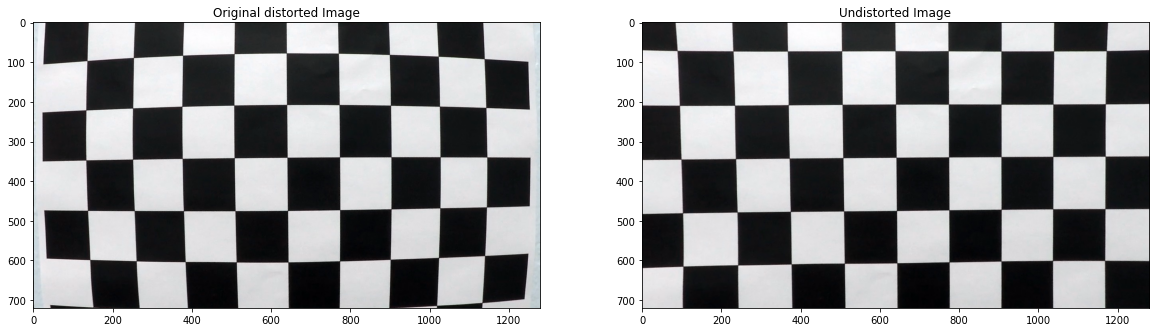

In [6]:
origin_img = cv2.imread(images[6])
undist_img = undistort(origin_img)

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(origin_img)
axes[0].set_title('Original distorted Image')
axes[1].imshow(undist_img)
axes[1].set_title('Undistorted Image')

test_images  6


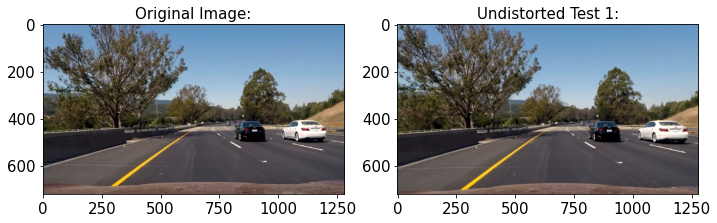

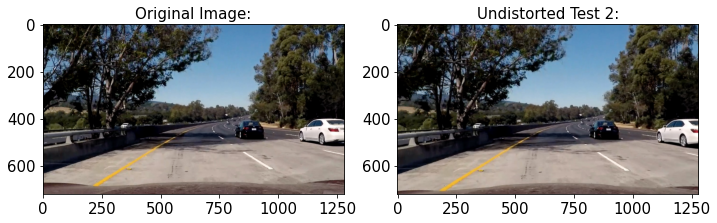

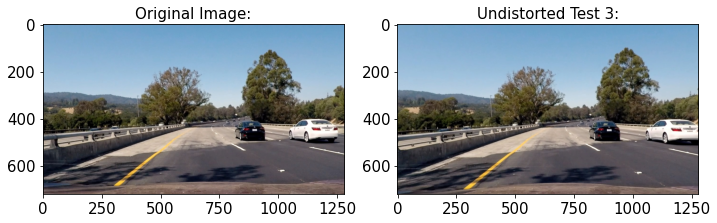

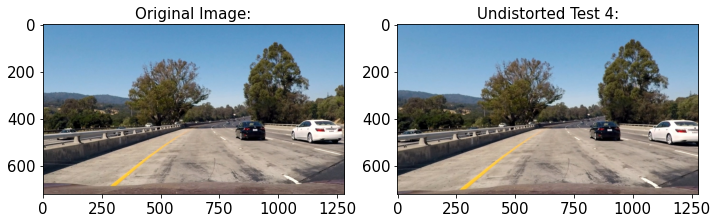

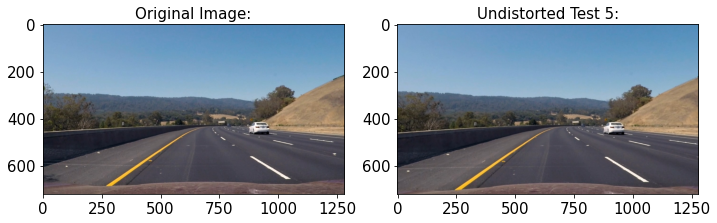

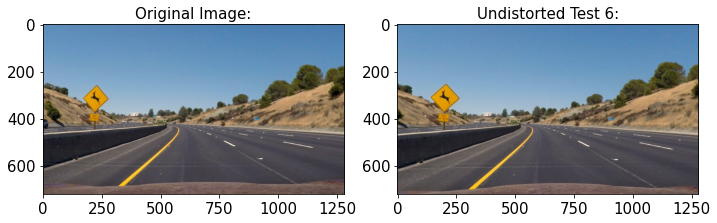

In [111]:
pipeline(op='Undistorted')

<h3>Create thresholded binary Image </h3>

<h6> Building the pipeline of fuctions for better readability and Maitenance </h6>

In [10]:
def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def plotter(test_img, new_img, plot_title=None, n=0):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    f.tight_layout()
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15)
    ax1.imshow(test_img)
    ax1.set_title('Original Image:', fontsize=15)
    ax2.imshow(new_img, cmap='gray')
    ax2.set_title('{0} Test {1}:'.format(plot_title, n+1), fontsize=15)

In [269]:
def pipeline(op=None):
    
    test_images = glob.glob('test_images/test*.jpg')
    print ('test_images ', len(test_images))
    n = 0
    for img in test_images:
        img = cv2.imread(img)
        bgr_img = bgr_to_rgb(img)
        if op == 'Undistorted':
            new_img = undistort(img)
            plotter(bgr_img, cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB), op, n)
            plt.savefig('output_images/undistorted.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Sobel X':
            new_img = undistort(img)
            new_img = abs_sobel_thresh(img,thresh=(35,255))
            plotter(bgr_img, new_img, op, n)
            plt.savefig('output_images/sobel_x.png'.format(op), bbox_inches="tight")
            break
        if op == 'Sobel Y':
            new_img = undistort(img)
            new_img = abs_sobel_thresh(img,orient='y',thresh=(35,255))
            plotter(bgr_img, new_img, op, n)
            plt.savefig('output_images/sobel_y.png'.format(op), bbox_inches="tight")
            break
        if op == 'Gradient Magnitude':
            new_img = undistort(img)
            new_img = mag_thresh(img)
            plotter(bgr_img, new_img, op, n)
            plt.savefig('output_images/gradient_magnitude.png'.format(op), bbox_inches="tight")
            break
        if op == 'Gradient Direction':
            new_img = undistort(img)
            new_img = dir_threshold(img)
            plotter(bgr_img, new_img, op, n)
            plt.savefig('output_images/gradient_direction.png'.format(op), bbox_inches="tight")
            break
        if op == 'Color Thresholds':
            new_img = undistort(img)
            new_img = hls_select(img)
            plotter(bgr_img, new_img, op, n)
            plt.savefig('output_images/color_thresholds.png'.format(op), bbox_inches="tight")
            break
        if op == 'Multi-Thresholded Binary':
            new_img = undistort(img)
            new_img = combined_threshold(new_img)
            plotter(bgr_img, new_img, op, n)
            plt.savefig('output_images/thresholded_binary.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Region Masking':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img = region_of_interest(new_img)
            plotter(bgr_img, new_img, op, n)
            plt.savefig('output_images/region_masked.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Perspective Transform':
            new_img = undistort(img)
            new_img = combined_threshold(new_img)
            #new_img = region_of_interest(new_img)
            new_img = original2bird_eye(new_img)
            plotter(bgr_img, new_img, op, n)
            plt.savefig('output_images/perspective_transform.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Sliding Windows':
            new_img = undistort(img)
            new_img = combined_threshold(new_img)
            new_img= original2bird_eye(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit,right_fit,left_lane_inds,right_lane_inds = sliding_windows(new_img, plot=True)
            plotter(bgr_img, windows_img, op, n)
            plt.plot(left_fitx, ploty, color='yellow')
            plt.plot(right_fitx, ploty, color='yellow')
            plt.xlim(0, 1280)
            plt.ylim(720, 0)
            plt.savefig('output_images/sliding_windows.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Shaded Lanes':
            undistorted_img = undistort(img)
            thresholded_img = combined_threshold(undistorted_img)
            bird_eyed_img= original2bird_eye(thresholded_img)
            windowded_img, pl, lfx, rfx, lf, rf, lli, rli =  sliding_windows(bird_eyed_img, plot=False)
            shaded_img = visualize_detected_lanes(bird_eyed_img,lf, rf, lli, rli, windowded_img) 
            plotter(bgr_img, shaded_img, op, n)
            plt.plot(lfx, pl, color='yellow')
            plt.plot(rfx, pl, color='yellow')
            plt.xlim(0, 1280)
            plt.ylim(720, 0)
            plt.savefig('output_images/shaded_lanes.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Radius of Curvature in Pixels':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, rightx,leftx_base, rightx_base = sliding_windows(new_img)
            left_curverad, right_curverad = roc_in_pixels(ploty, left_fit, right_fit, leftx, rightx)
            print('Test Image {0}\nLeft Radius of Curvature: {1:2f} pixels\nRight Radius of Curvature: {2:2f} pixels\n'.format(n+1, left_curverad, right_curverad))
            break
        if op == 'Radius of Curvature in Meters':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, 
            right_fit, leftx,rightx, leftx_base, rightx_base = sliding_windows(new_img)
            left_curverad, right_curverad = roc_in_meters(ploty, left_fit, right_fit, leftx, rightx)
            print('Test Image {0}\nLeft Radius of Curvature: {1:2f} meters\nRight Radius of Curvature: {2:2f} meters\n'.format(n+1, left_curverad, right_curverad))
            break
        if op == 'Camera Offset':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, rightx, leftx_base, rightx_base = sliding_windows(new_img)
            width = img.shape[1]
            img_center = width/2
            camera = offset(img_center, leftx_base, rightx_base)
            print('Test Image: {0}\nOffset from Lane Center: {1:2f} meters\n'.format(n+1, camera))
            break
        if op == "Histogram":
            img = undistort(img)
            img = original2bird_eye(img)
            f, axes= plt.subplots(1,3,figsize=(20,5))
            index=0
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            axes[0].imshow(img)
            axes[0].set_title("Original Wraped Image",fontsize=15)
            combinedImage=combined_threshold(img)
            axes[1].imshow(combinedImage,cmap="gray")
            axes[1].set_title("Thresholded Binary Image",fontsize=15)
            histogram = get_histogram(combinedImage)
            axes[2].plot(histogram)
            axes[2].set_title("Histogram",fontsize=15)

        if op == 'Lane Mapping':            
            undistorted = undistort(img)
            thresholded = combined_threshold(undistorted) 
            binary_warped = original2bird_eye(thresholded)
            out_img, pl, lfx, rfx, lf, rf, lli, rli =  sliding_windows(binary_warped)
            final_img = draw_green_lanes(img,binary_warped, lf, rf)
            plotter(bgr_img, cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB), op, n)
            plt.savefig('output_images/lane_mapping.png'.format(op), bbox_inches="tight")
            
        n += 1

In [226]:
# Load test images.
testImages = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), 
                      glob.glob('./test_images/*.jpg')))

<h6> Functions to work with direvatives of images in x and y directions. </h6>


In [75]:
# function to return thresholded gradient based binary output 
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0,255)): 
    # 1. Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2. Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x': 
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else: 
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3. Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    
    # 4. Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(abs_sobel * 255 / np.max(abs_sobel))
    
    # 5. Threshold the scaled_sobel and create a binary output
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel > thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    
    return binary_output

test_images  6


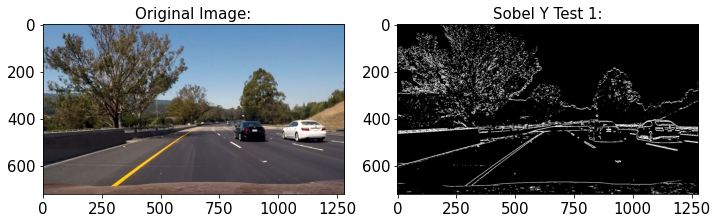

In [76]:
pipeline(op='Sobel Y')

test_images  6


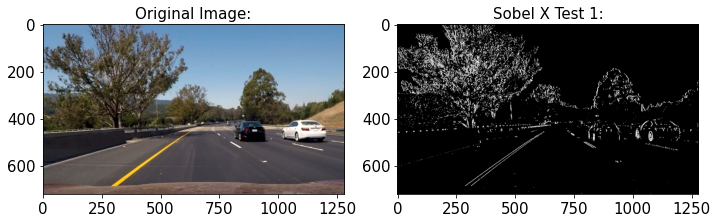

In [77]:
pipeline(op='Sobel X')

In [78]:
# function to return magnitute of derivatives thresholded binary output
def mag_thresh(img, sobel_kernel=3, thresh=(50,255)): 
    # 1. Convert to grayscale 
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2. Take the gradient in x and y separately 
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3. Calculate the magnitude
    magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    
    # 4. Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_mag = np.uint8(magnitude * 255 / np.max(magnitude))
    
    # 5. Create a binary mask where magnitude thresholds are met 
    binary_output = np.zeros_like(scaled_mag)
    binary_output[(scaled_mag > thresh[0]) & (scaled_mag <= thresh[1])] = 1
    
    return binary_output

test_images  6


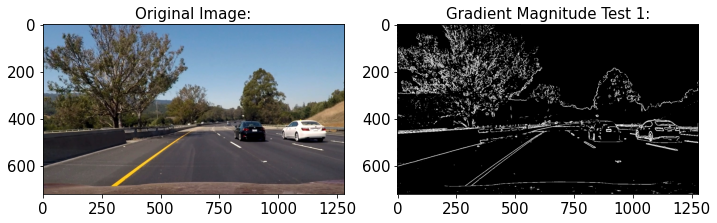

In [79]:
pipeline(op='Gradient Magnitude')

In [80]:
# function to return direction of derivatives thresholded binary output
def dir_threshold(img, sobel_kernel=3, thresh=(0.7, 1.1)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)

    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    dir_grad = np.arctan2(abs_sobely, abs_sobelx)

    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(gray)
    binary_output[(dir_grad >= thresh[0]) & (dir_grad <= thresh[1])] = 1

    return binary_output

test_images  6


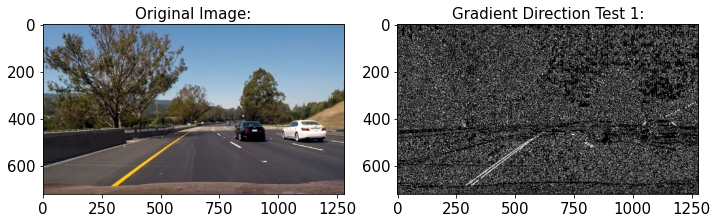

In [81]:
pipeline(op='Gradient Direction')

In [86]:
# Get pixel values for white colors from all RGB channels 
def rgb_white(img):
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    binary_output = np.zeros_like(r)
    binary_output[(r >= 210) & (g >= 200) & (b >= 190)] = 1
    return binary_output

# Filter out the lower pixel values in all RGB channels to avoid shadow
def suppress_shadow(img):
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    binary_output = np.zeros_like(r)
    binary_output[(r > 30) | (g > 30) | (b > 30)] = 1
    return binary_output

# Convert RGB to HLS color space and return a thresholded channel
def hls_select(img, selected='s', thresh=(80, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    # 2) Apply a threshold to the selected channel
    idx = {'h': 0, 'l': 1, 's': 2}[selected.lower()]
    channel = hls[:, :, idx]

    binary_output = np.zeros_like(channel)
    binary_output[(channel > thresh[0]) & (channel <= thresh[1])] = 1
    return binary_output

test_images  6


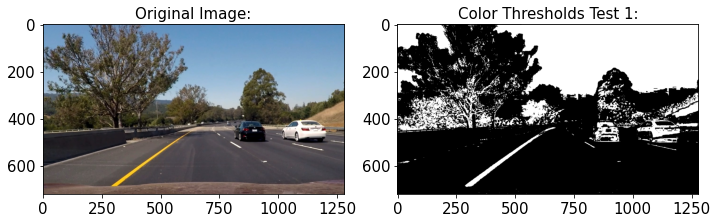

In [87]:
pipeline(op='Color Thresholds')

In [88]:
def combined_threshold(image):
    """return the binary warp result of the image"""
    ksize = 5

    # Apply each of the thresh-holding functions
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(50, 255))
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(100, 255))
    s_channel = hls_select(image, selected='s', thresh=(180, 255)) & suppress_shadow(image)
    white = rgb_white(image)
    shadowed_yellow = hls_select(image, selected='h', thresh=(18, 63)) & \
                      hls_select(image, selected='s', thresh=(55, 255)) & \
                      hls_select(image, selected='l', thresh=(0, 140))

    combined = gradx | grady | s_channel | shadowed_yellow | white
    return combined

test_images  6


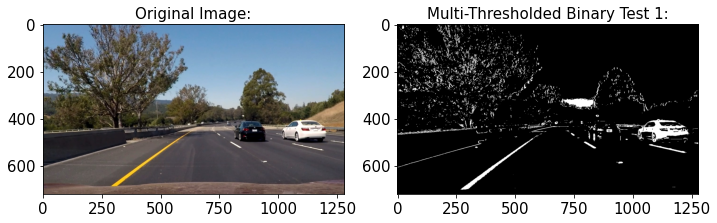

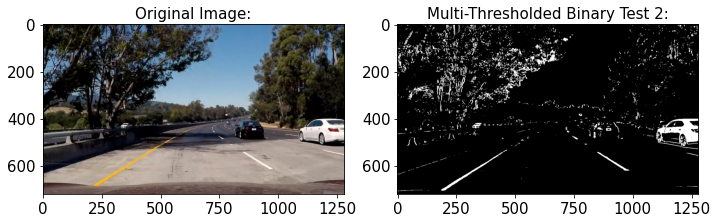

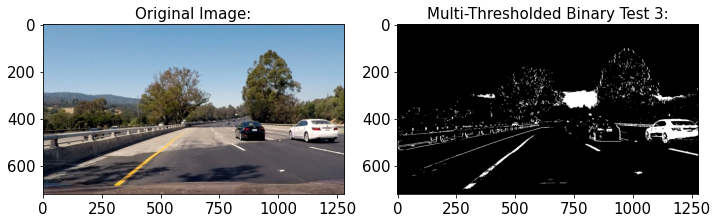

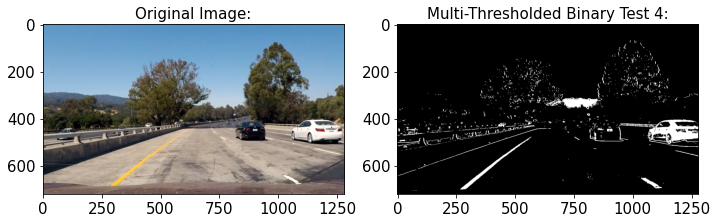

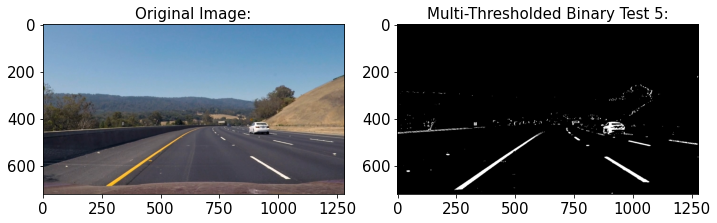

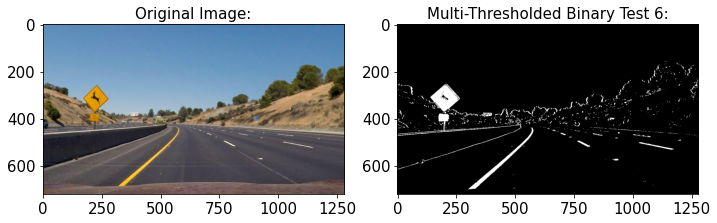

In [89]:
pipeline(op='Multi-Thresholded Binary')

<h3>Perspective Transform</h3> 

In [96]:
# Source matrix
src = np.array([[580, 460],
                [203, 720],
                [1127, 720],
                [705, 460]], dtype=np.float32)

# Target matrix to transform to
dst = np.array([[320, 0],
                [320, 720],
                [960, 720],
                [960, 0]], dtype=np.float32)

source = np.float32([[490, 482],[810, 482],
                  [1250, 720],[40, 720]])
destination = np.float32([[0, 0], [1280, 0], 
                 [1250, 720],[40, 720]])
left_end, right_end = 250, 1080

# transform matrix
trans_matrix = cv2.getPerspectiveTransform(source, destination)
invert_matrix = cv2.getPerspectiveTransform(destination, source)
#trans_matrix = cv2.getPerspectiveTransform(src, dst)
#invert_matrix = cv2.getPerspectiveTransform(dst, src)


def original2bird_eye(image):
    return cv2.warpPerspective(image, trans_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)


def bird_eye2original(image):
    return cv2.warpPerspective(image, invert_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)

test_images  6


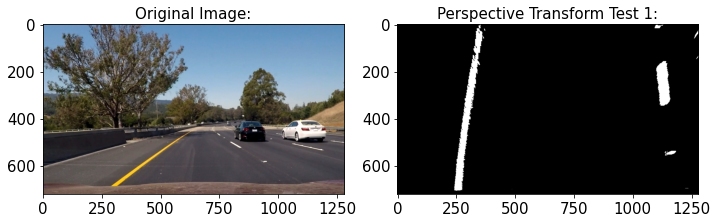

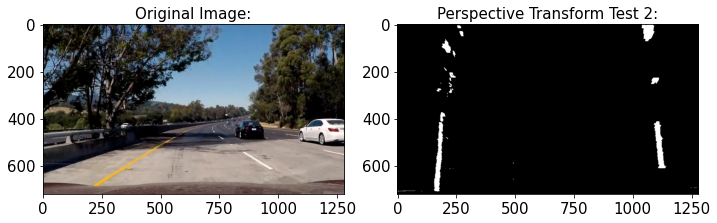

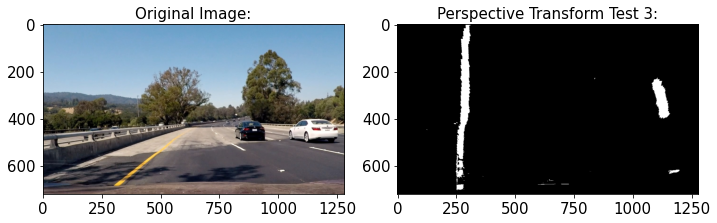

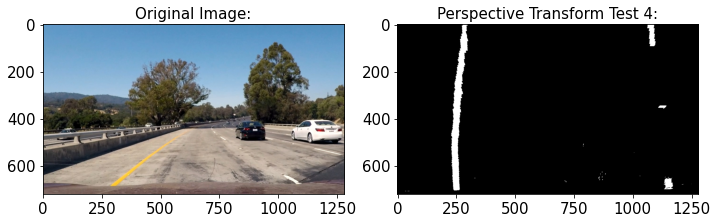

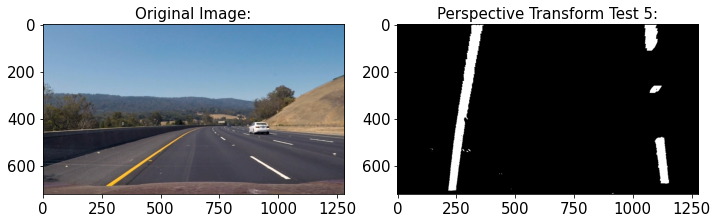

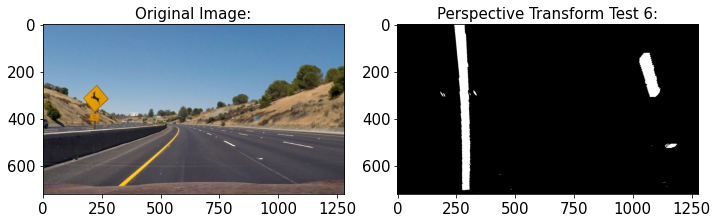

In [97]:
pipeline(op='Perspective Transform')


<h4> Detect lane pixels and fit to find the lane boundary </h4>

In [131]:
 def get_histogram(warpedimage):
    return np.sum(warpedimage[warpedimage.shape[0]//2:,:], axis=0)

test_images  6


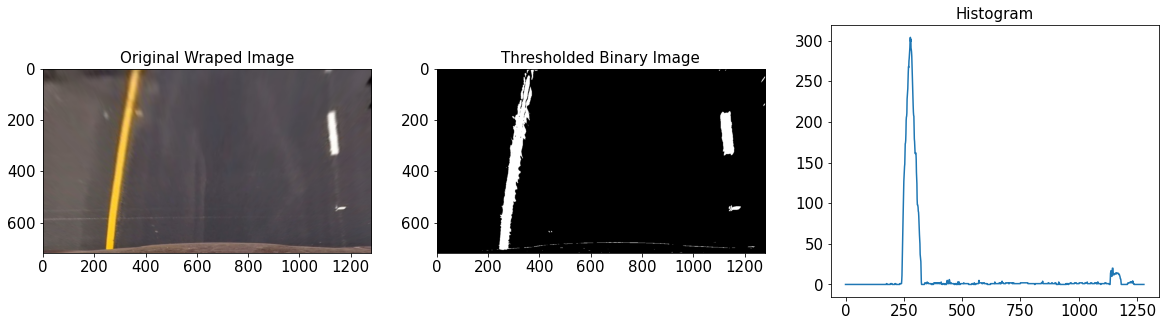

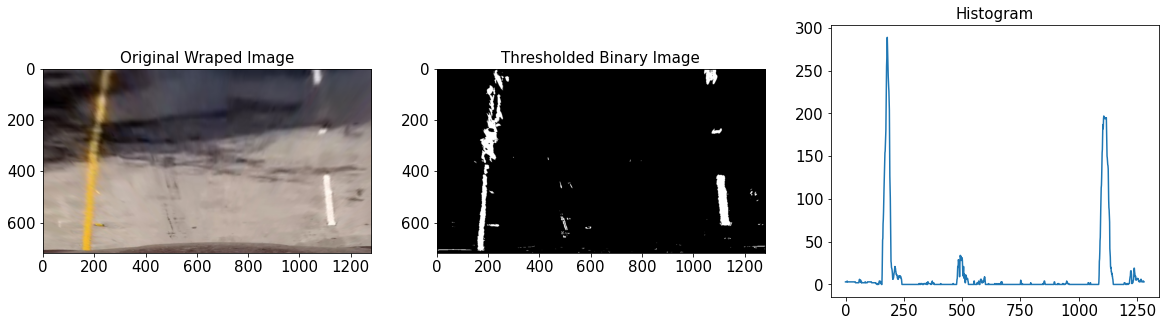

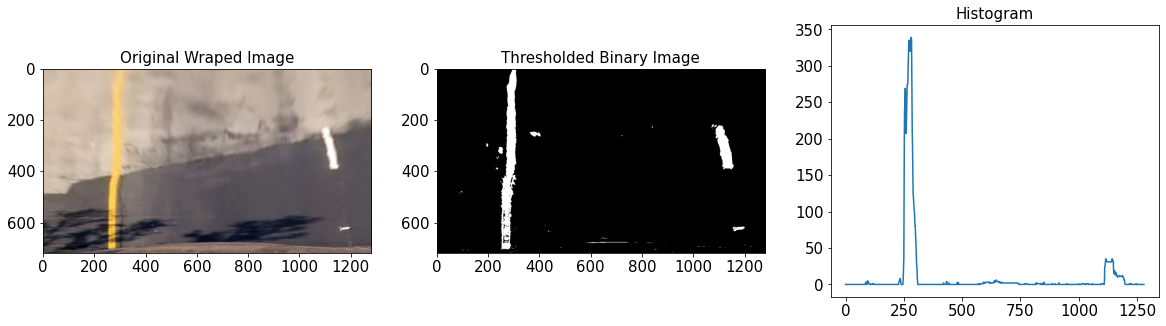

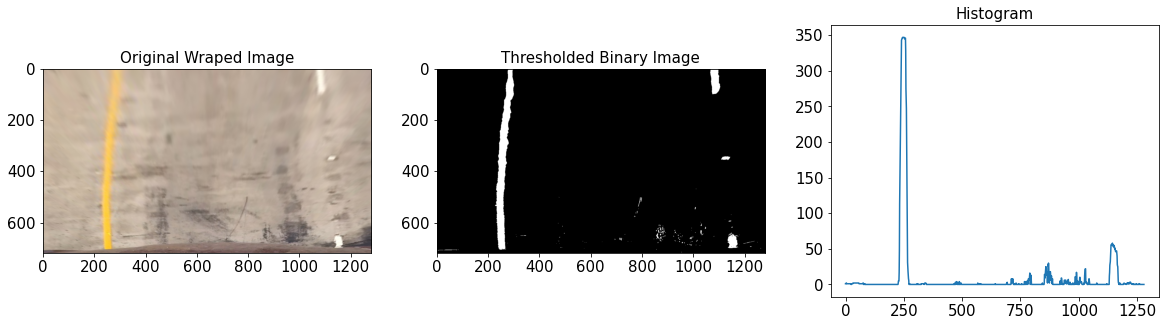

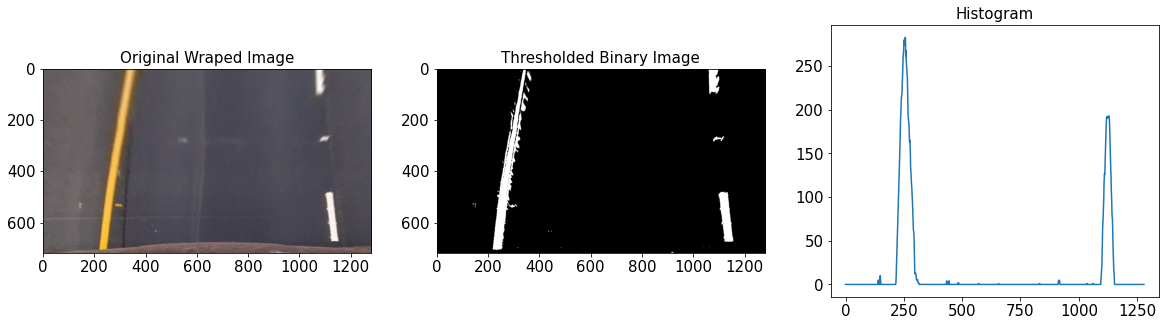

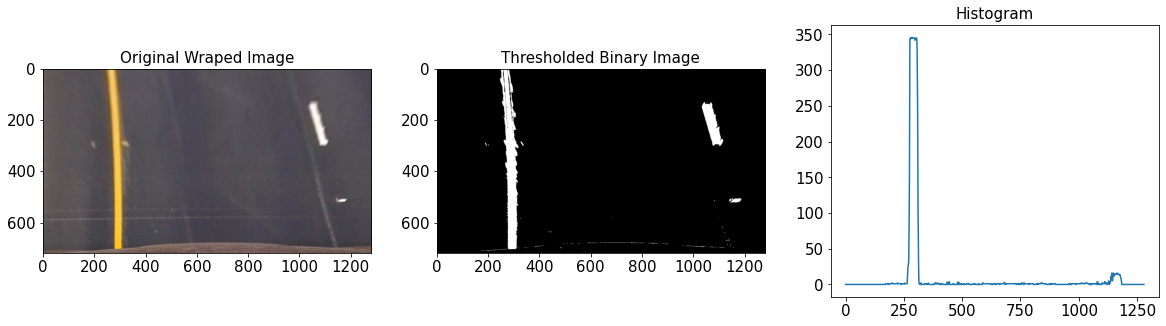

In [136]:
pipeline(op='Histogram')


<h4> Find Lines using Sliding Window </h4>


In [203]:
# Set the hyperparameters

# Choose the number of sliding windows
nwindows = 9
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50

# Method to get base points for left and right lanes
def get_lane_base_points(binary_warped): 
    # Take the histogram of bottom half of the image
    histogram = get_histogram(binary_warped)
    # Find the peaks of the left and right halves of the histogram 
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    left_base = np.argmax(histogram[:midpoint])
    right_base = np.argmax(histogram[midpoint:]) + midpoint
    return left_base, right_base, histogram

def sliding_windows(binary_warped, plot=False):
    # Get base points for left and right lanes
    leftx_base, rightx_base, histogram = get_lane_base_points(binary_warped)
    
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        if(plot==True):
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty +left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return out_img, ploty, left_fitx, right_fitx, left_fit, right_fit, left_lane_inds, right_lane_inds
    #return out_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, rightx, leftx_base, rightx_base

test_images  6


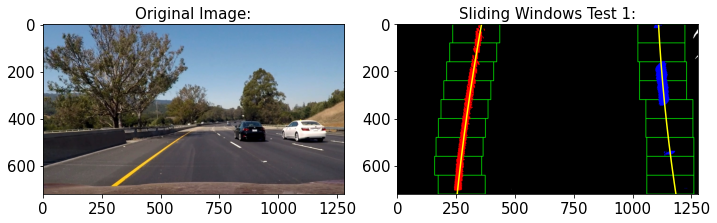

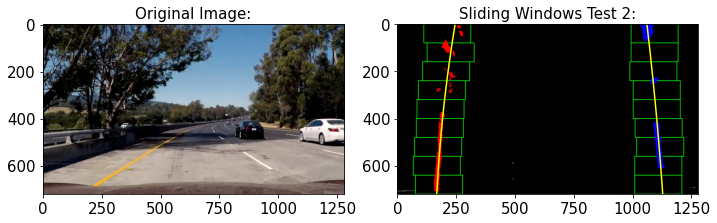

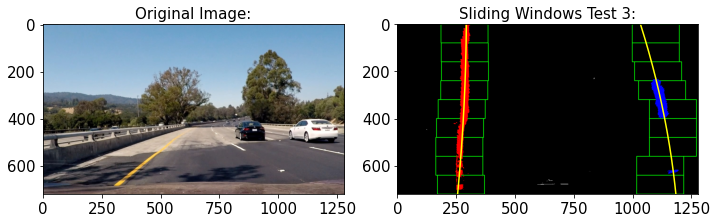

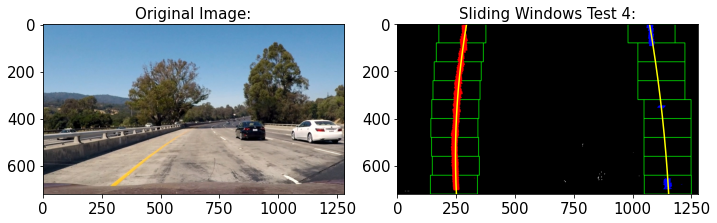

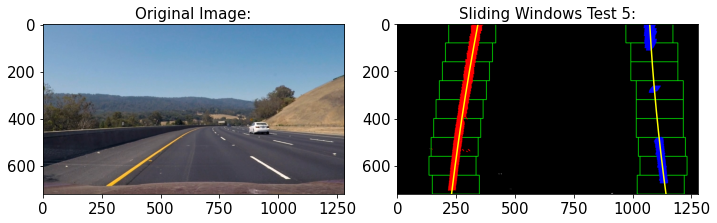

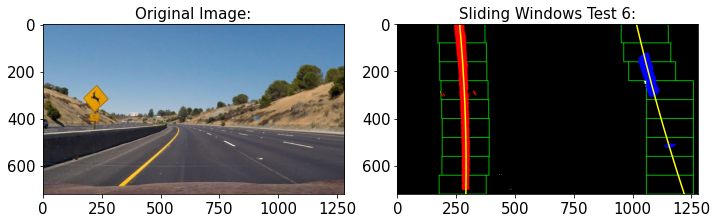

In [189]:
pipeline(op='Sliding Windows')

In [273]:
def visualize_detected_lanes(binary_warped, left_fit,right_fit, left_lane_inds, right_lane_inds,out_img):
    margin = 100
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty +left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
   
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    return result

test_images  6


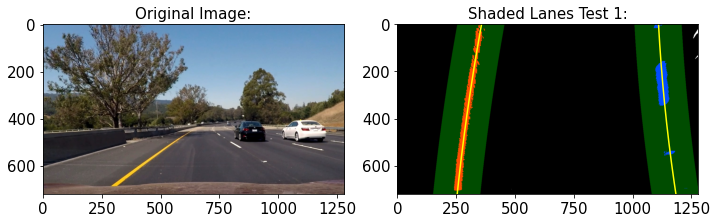

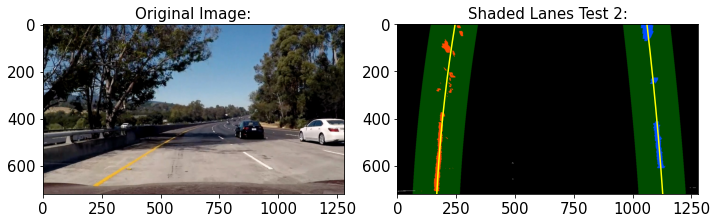

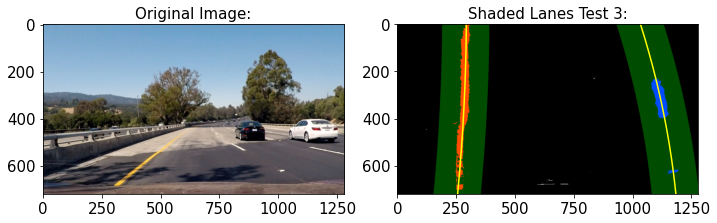

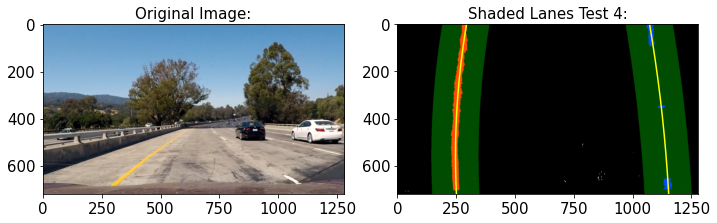

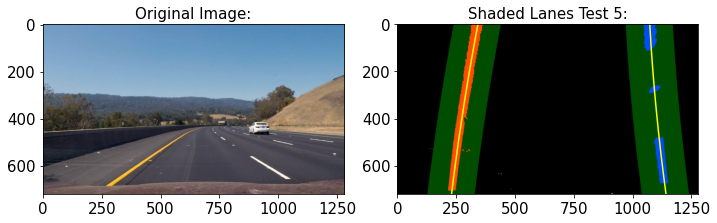

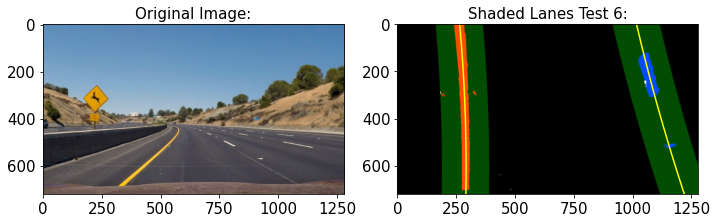

In [276]:
pipeline('Shaded Lanes')

In [274]:

def draw_green_lanes(original_image,binary_warped, left_fit, right_fit):
    
    h,w= binary_warped.shape
    Minv = cv2.getPerspectiveTransform(dst, src)
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty +left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2] 
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
   
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    #axes[index+1].imshow(newwarp)
    # Combine the result with the original image
    result = cv2.addWeighted(original_image, 1, newwarp, 0.5, 0)
    return result

test_images  6


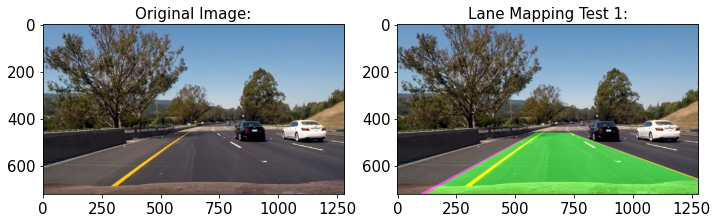

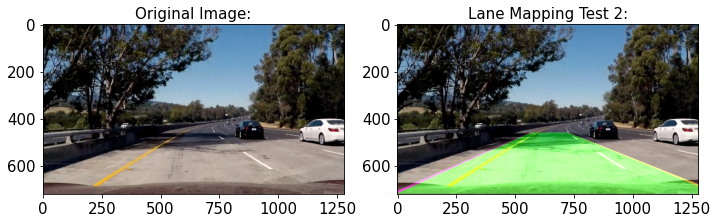

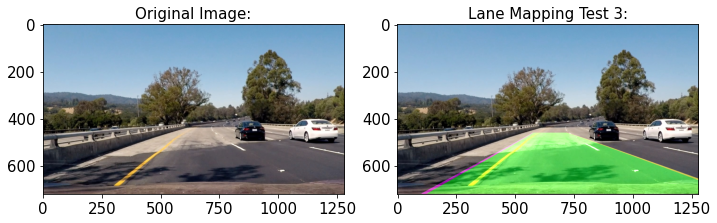

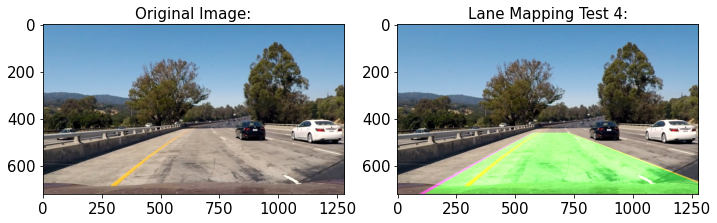

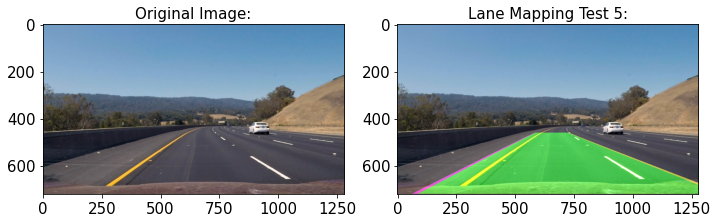

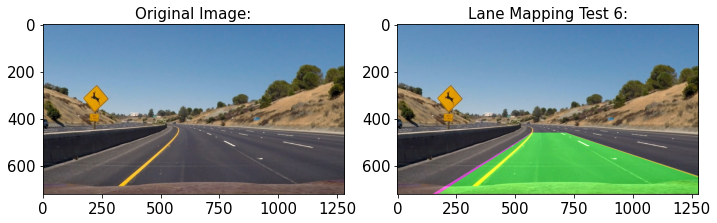

In [275]:
pipeline('Lane Mapping')